# **Milestone 1**

## Problem Definition
**The context:** Why is this problem important to solve?<br>
**The objectives:** What is the intended goal?<br>
**The key questions:** What are the key questions that need to be answered?<br>
**The problem formulation:** What is it that we are trying to solve using data science?

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## <b>Important Notes</b>

- This notebook can be considered a guide to refer to while solving the problem. The evaluation will be as per the Rubric shared for each Milestone. Unlike previous courses, it does not follow the pattern of the graded questions in different sections. This notebook would give you a direction on what steps need to be taken in order to get a viable solution to the problem. Please note that this is just one way of doing this. There can be other 'creative' ways to solve the problem and we urge you to feel free and explore them as an 'optional' exercise. 

- In the notebook, there are markdowns cells called - Observations and Insights. It is a good practice to provide observations and extract insights from the outputs.

- The naming convention for different variables can vary. Please consider the code provided in this notebook as a sample code.

- All the outputs in the notebook are just for reference and can be different if you follow a different approach.

- There are sections called **Think About It** in the notebook that will help you get a better understanding of the reasoning behind a particular technique/step. Interested learners can take alternative approaches if they want to explore different techniques. 

### **Import the necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV

from tabulate import tabulate


import warnings
warnings.filterwarnings('ignore')

### **Read the dataset**

In [2]:
hm=pd.read_csv("hmeq.csv")

In [3]:
# Copying data to another variable to avoid any changes to original data
data=hm.copy()

### **Print the first and last 5 rows of the dataset**

In [4]:
# Display first five rows

data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [5]:
# Display last 5 rows

data.tail()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


### **Understand the shape of the dataset**

In [6]:
# Check the shape of the data

data.shape

(5960, 13)

- The dataset has **5960 rows and 13 columns**

### **Check the data types of the columns**

In [7]:
# Check info of the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


**Insights**
- `REASON`, `JOB` are of object types while the rest of the columns are of numeric types.

### **Check for missing values**

In [8]:
# Analyse missing values - Hint: use isnull() function

data.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [9]:
# Check the percentage of missing values in the each column.
# Hint: divide the result from the previous code by the number of rows in the dataset

num_rows = data.shape[0]
data.isnull().sum()/num_rows

BAD        0.000000
LOAN       0.000000
MORTDUE    0.086913
VALUE      0.018792
REASON     0.042282
JOB        0.046812
YOJ        0.086409
DEROG      0.118792
DELINQ     0.097315
CLAGE      0.051678
NINQ       0.085570
CLNO       0.037248
DEBTINC    0.212584
dtype: float64

**Insights**
- Every column except `BAD` and `LOAN` have missing values.
- `DEBTINC` has 21.26% of values missing.
- We could set a limit for missing values at 22% or above to avoid eliminating any of the columns.
- Filling the missing values with 0 or the mean may throw off our data as we're filling in missing values with potentially incorrect values.
- Avoiding/Dropping missing values won't lead to incorrect data, but it may be impractical if the dataset is small or the missing values take up a significant portion of the dataset. Alternatively, there may be a reason why certain fields have missing values which correlate with the outcome variable of interest.
  - In this case, the reason why `DEBTINC` may have 1267 missing values is because the income recorded was 0 or missing, thus making `DEBTINC` a divide-by-zero error. No income could be a predictor of clients defaulting, so dropping all these missing values may adversely affect the robustness of our classification model.

### **Think about it:**
- We found the total number of missing values and the percentage of missing values, which is better to consider?
- What can be the limit for % missing values in a column in order to avoid it and what are the challenges associated with filling them and avoiding them? 

**We can convert the object type columns to categories**

`converting "objects" to "category" reduces the data space required to store the dataframe`

### **Convert the data types**

In [10]:
cols = data.select_dtypes(['object']).columns.tolist()

#adding target variable to this list as this is an classification problem and the target variable is categorical

cols.append('BAD')

In [11]:
cols

['REASON', 'JOB', 'BAD']

In [12]:
# Changing the data type of object type column to category. hint use astype() function

for i in cols:
    data[i] = data[i].astype('category')

In [13]:
# Checking the info again and the datatype of different variable

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   BAD      5960 non-null   category
 1   LOAN     5960 non-null   int64   
 2   MORTDUE  5442 non-null   float64 
 3   VALUE    5848 non-null   float64 
 4   REASON   5708 non-null   category
 5   JOB      5681 non-null   category
 6   YOJ      5445 non-null   float64 
 7   DEROG    5252 non-null   float64 
 8   DELINQ   5380 non-null   float64 
 9   CLAGE    5652 non-null   float64 
 10  NINQ     5450 non-null   float64 
 11  CLNO     5738 non-null   float64 
 12  DEBTINC  4693 non-null   float64 
dtypes: category(3), float64(9), int64(1)
memory usage: 483.7 KB


### **Analyze Summary Statistics of the dataset**

In [14]:
# Analyze the summary statistics for numerical variables

data.describe().T

,count,mean,std,min,25%,50%,75%,max
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000
DEBTINC,4693.0,33.779915,8.601746,0.524499,29.140031,34.818262,39.003141,203.312149


**Insights**
- The average loan was \\$18,607, and 75% of the loans were at or under \\$23,300. Since the max was \\$89,900, we should expect to see the loan distribution skewed right with outliers on the high end.
-  The middle 50% of the value of the property ranges between \\$66,075 and \\$119,824. Once again, the \\$855,909 value of the most expensive property suggests outlier on the upper bound.
-  Both the derogatory reports and delinquent credit lines show that at least 75% of clients had none of either. And while having either of a derogatory report or delinquent credit line likely will result in a greater chance of the loan being defaulted, because most clients do not have either of those reports or credit line, neither field will be a good predictor of default status.
-  50% of clients have a mortgage due of \\$65,019 or less and more than 75% of clients have a mortgage due of less than \\$91,500.

In [15]:
# Check summary for categorical data

data.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


**Insights**
- The outcome variable `BAD` has two possibilities: 0 = Loan Repaid 1 = Client defaulted. 80% of the outcomes in the dataset was the loan being repaid.
- Similarly, `REASON` for the loan request has two possible options: Debt Consolidation and Home Improvement. Debt Consolidation makes up about 69% of the reasons.
- Of the 6 `JOB` options, Other is the most popular in the dataset, consisting of 42%.

**Let's look at the unique values in all the categorical variables**

In [16]:
# Checking the count of unique values in each categorical column 

cols_cat= data.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts())
    print('*'*40)

Unique values in BAD are :
0    4771
1    1189
Name: BAD, dtype: int64
****************************************
Unique values in REASON are :
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
****************************************
Unique values in JOB are :
Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64
****************************************


**Insights**
- Now we have a distribution of the `JOB` values. After Other, Professional/Executive is the most popular at 22% of the dataset. Office and Manager both weigh in over 10% each. Self and Sales are not common in the dataset.
- Although we've talked about percentages in regards to categorical variables, this is the implementation of how much each is represented in the dataset:

In [17]:
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(data[i].value_counts()/data[i].count())
    print('*'*40)

Unique values in BAD are :
0    0.800503
1    0.199497
Name: BAD, dtype: float64
****************************************
Unique values in REASON are :
DebtCon    0.688157
HomeImp    0.311843
Name: REASON, dtype: float64
****************************************
Unique values in JOB are :
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: JOB, dtype: float64
****************************************


### **Think about it**
- The results above gave the absolute count of unique values in each categorical column. Are absolute values a good measure? 
- If not, what else can be used? Try implementing that. 

## **Exploratory Data Analysis (EDA) and Visualization**

## **Univariate Analysis**

Univariate analysis is used to explore each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It can be done for both numerical and categorical variables

### **1. Univariate Analysis - Numerical Data**
Histograms and box plots help to visualize and describe numerical data. We use box plot and histogram to analyze the numerical columns.

In [18]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and return the boxplots and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

#### Using the above function, let's first analyze the Histogram and Boxplot for LOAN

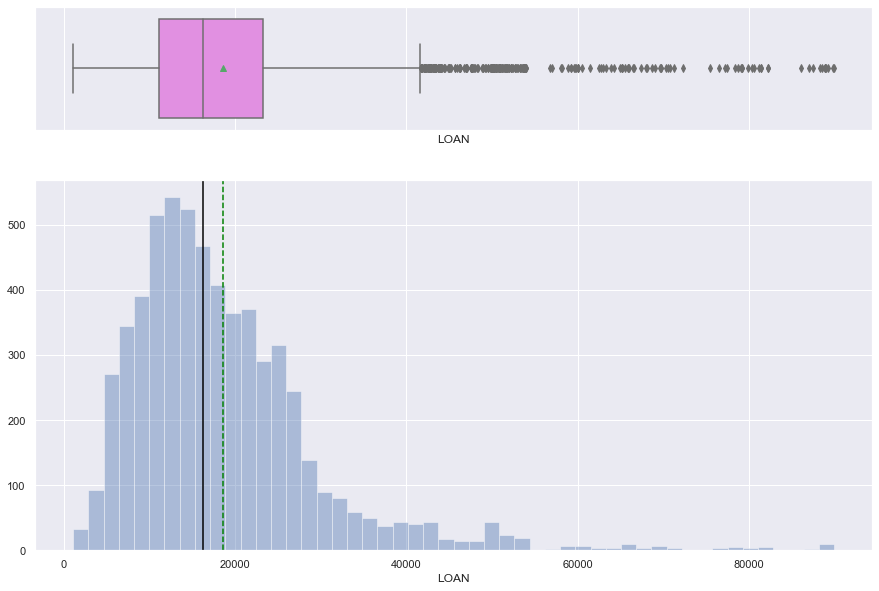

In [19]:
# Build the histogram boxplot for Loan
histogram_boxplot(data['LOAN'])

**Insights**
- The histogram and boxplot confirm that the loans are skewed right.
- They both show a considerable amount of outliers on the upper bound of the distribution.

#### **Note:** As done above, analyze Histogram and Boxplot for other variables

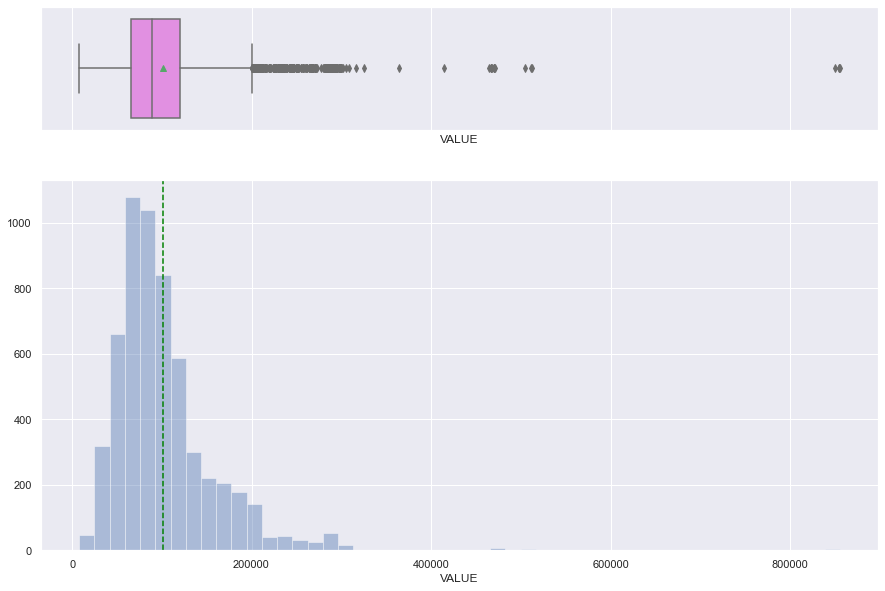

In [20]:
# Build the histogram boxplot for Property Value
histogram_boxplot(data['VALUE'])

**Insights**
- The boxplot and histogram confirm that property values are skewed right.
- While most of the outliers are between \\$200,000 and \\$300,000, between ten and twenty exceed \\$300,000 and two exceed \\$800,000

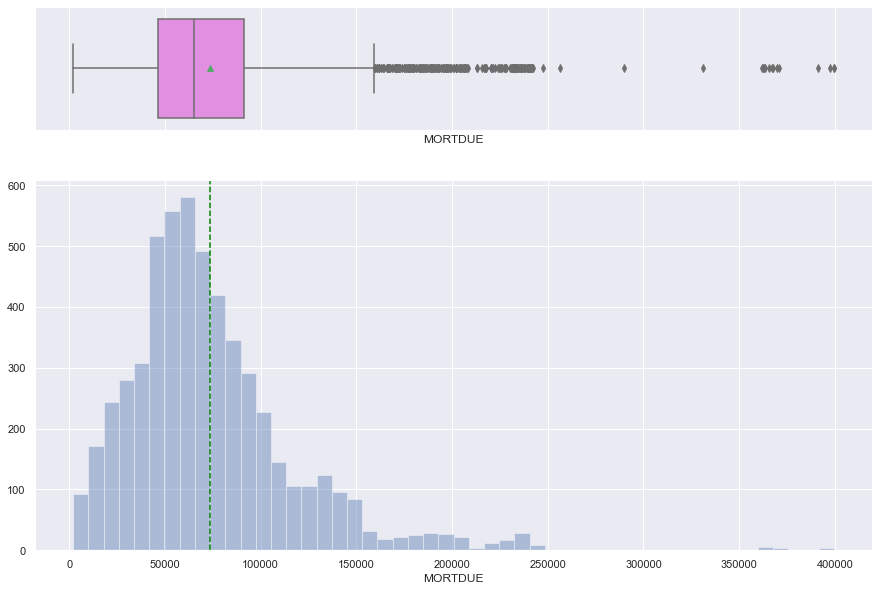

In [21]:
# Build the histogram boxplot for Mortgage Due
histogram_boxplot(data['MORTDUE'])

**Insights**
- The boxplot and histogram confirm that mortgage due is skewed right.
- Most of the outliers are between \\$160,000 and \\$250,000. A few of the outliers exceed \\$250,000 reaching up to nearly \\$400,000

### **2. Univariate Analysis - Categorical Data**

In [22]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # height of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percentage 
        
    plt.show() # show the plot

#### **Note:** As done above, analyze Histogram and Boxplot for other variables.

#### Analyze Barplot for DELINQ

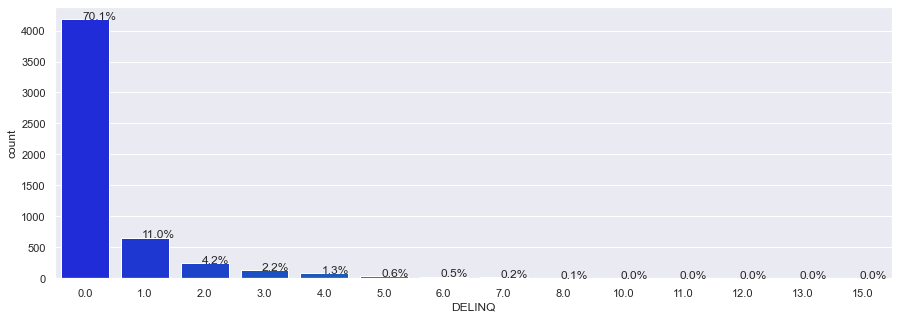

In [23]:
#Build barplot for DELINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DELINQ"],palette='winter')
perc_on_bar(ax,data["DELINQ"])

**Insights**
- Over 70% of clients had no delinquent credit lines.
- Over 80% had 1 or fewer delinquent credit lines.

#### Analyze Barplot for DEROG

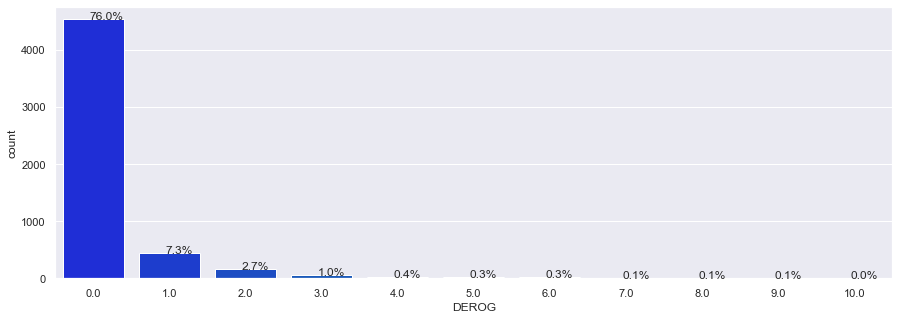

In [24]:
#Build barplot for DEROG

plt.figure(figsize=(15,5))
ax = sns.countplot(data["DEROG"],palette='winter')
perc_on_bar(ax,data["DEROG"])

**Insights**
- 76% of clients had no derogatory reports.
- 10% of clients had 1 or 2 derogatory reports.

#### Analyze Barplot for NINQ

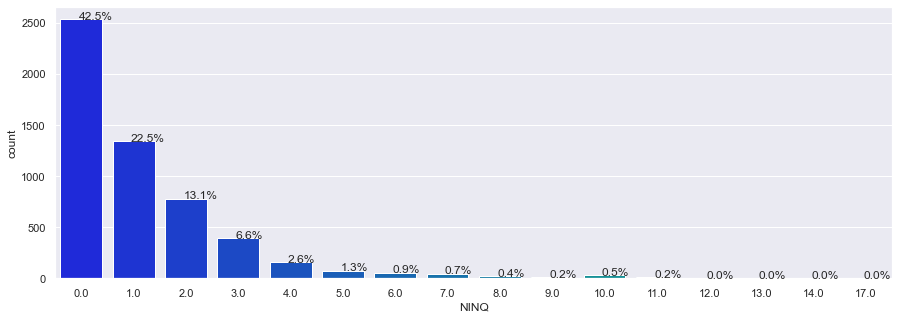

In [25]:
#Build barplot for NINQ

plt.figure(figsize=(15,5))
ax = sns.countplot(data["NINQ"],palette='winter')
perc_on_bar(ax,data["NINQ"])

**Insights**
- 42.5% of clients had no recent credit inquiries.
- 22.5% of clients had 1 recent credit inquiries, and 20% of clients had between 2 and 3 recent credit inquiries.

## **Bivariate Analysis**

###**Bivariate Analysis: Continuous and Categorical Variables**

#### Analyze BAD vs Loan

<AxesSubplot:xlabel='BAD', ylabel='LOAN'>

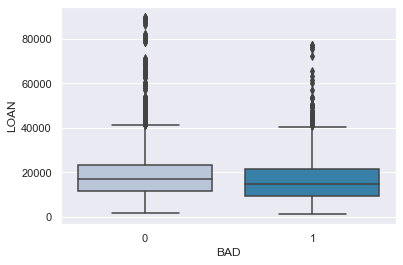

In [26]:
sns.boxplot(data["BAD"],data['LOAN'],palette="PuBu")

**Insights**
- The Loan distribution for clients who defaulted is very similar to the distribution for clients who repaid their loans.
- Clients who defaulted had a lower median and max loan amount.

#### **Note:**
As shown above, perform Bi-Variate Analysis on different pair of Categorical and continuous variables

### **Bivariate Analysis: Two Continuous Variables**

<AxesSubplot:xlabel='VALUE', ylabel='MORTDUE'>

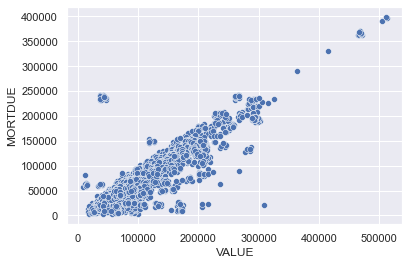

In [27]:
sns.scatterplot(data["VALUE"],data['MORTDUE'],palette="PuBu")

**Insights:**
- The mortgage due and property value have a strong positive correlation.
- This is logical as the more a property costs, the greater the loan needed to purchase the property, and the greater the mortgage payments will be.

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of continuous variables

<AxesSubplot:xlabel='VALUE', ylabel='LOAN'>

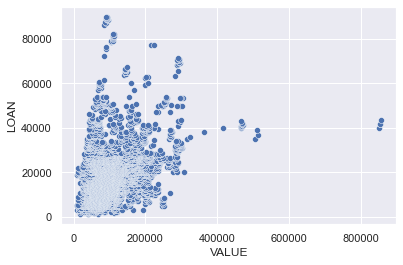

In [28]:
sns.scatterplot(data["VALUE"],data['LOAN'],palette="PuBu")

**Insights**
- There is a weak positive correlation between the property value and loan amount.
- Most of the data is clustered in the lower left, indicating that most clients have a low property value and a low loan amount.
- Interestingly, the clients whose property values exceeded \\$800,000 did not take the highest loans. Their loan amounts were around \\$40,000 to \\$50,000

<AxesSubplot:xlabel='DEBTINC', ylabel='MORTDUE'>

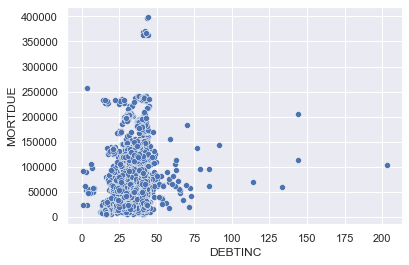

In [29]:
sns.scatterplot(data["DEBTINC"],data['MORTDUE'],palette="PuBu")

**Insights**
- There isn't a strong correlation between debt-to-income ration and the mortgage due.
- Similar to the `VALUE`-`LOAN` scatterplot, most of the data is clustered in the lower left, indicating that most clients have a low debt-to-income ratio and a mortgage due.

### **Bivariate Analysis:  BAD vs Categorical Variables**

**The stacked bar chart (aka stacked bar graph)** extends the standard bar chart from looking at numeric values across one categorical variable to two.

In [30]:
### Function to plot stacked bar charts for categorical columns

def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['BAD'],margins=True)
    print(tab1)
    print('-'*120)
    tab = pd.crosstab(x,data['BAD'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Plot stacked bar plot for for BAD and REASON

BAD         0     1   All
REASON                   
DebtCon  3183   745  3928
HomeImp  1384   396  1780
All      4567  1141  5708
------------------------------------------------------------------------------------------------------------------------


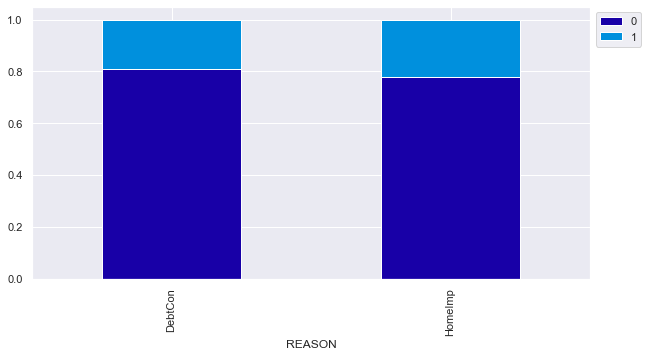

In [31]:
# Plot stacked bar plot for BAD and REASON
stacked_plot(data['REASON'])

**Insights**
- 19% of clients who took out a loan for Debt Consolidation defaulted on the loan.
- 22% of clients who took out a loan for Home Improvement defaulted on the loan.
- The default rate is similar between the two reasons which indicates that the reason will not be a good predictor of defaulting.

#### **Note:** As shown above, perform Bivariate Analysis on different pairs of Categorical vs BAD

#### Plot stacked bar plot for for JOB and REASON

BAD         0     1   All
JOB                      
Mgr       588   179   767
Office    823   125   948
Other    1834   554  2388
ProfExe  1064   212  1276
Sales      71    38   109
Self      135    58   193
All      4515  1166  5681
------------------------------------------------------------------------------------------------------------------------


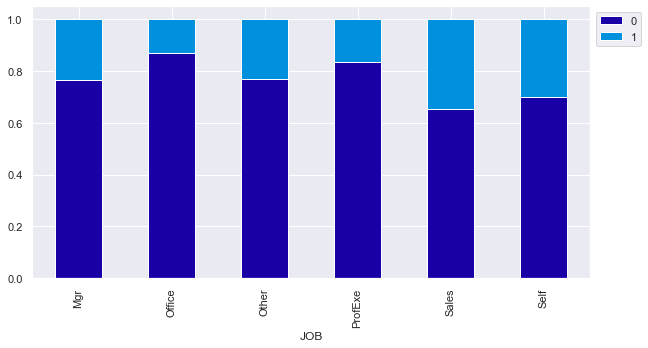

In [32]:
# Plot stacked bar plot for JOB and REASON
stacked_plot(data['JOB'])

**Insights**
- Clients who work in Sales had the highest default rate at 35%.
- Clients who work in Office jobs had the lowest at 13%.
- Interestingly, the two jobs with the least representation -- Sales and Self-Employed -- had the worst default rates. Perhaps due to the inconsistent income from these jobs and possibly the lowest income of the job group, we don't see as many Sales and Self-Employed apply for loans in the first place.

### **Multivariate Analysis**

#### Analyze Correlation Heatmap for Numerical Variables

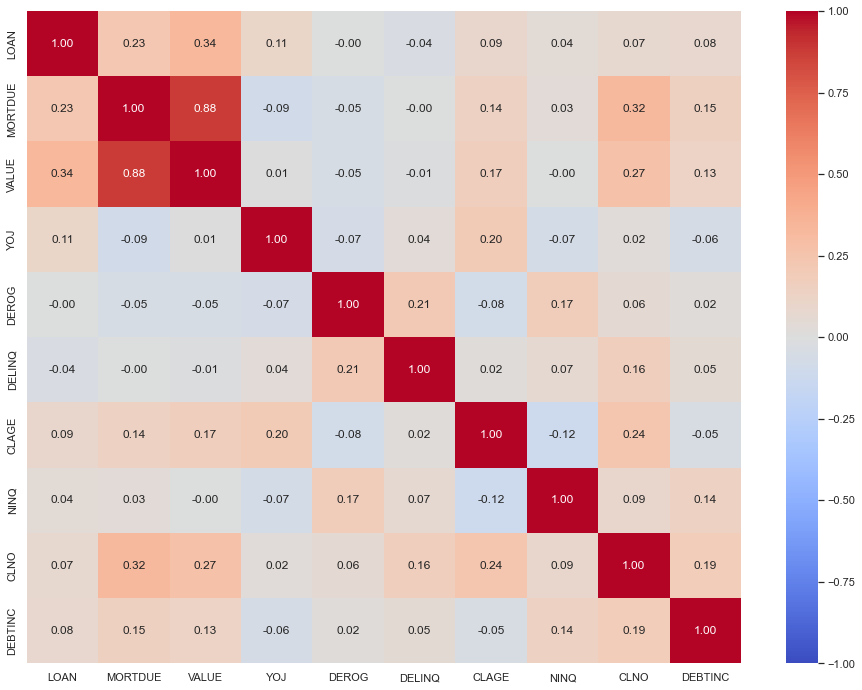

In [33]:
# Separating numerical variables
numerical_col = data.select_dtypes(include=np.number).columns.tolist()

# Build correlation matrix for numerical columns

corr = data[numerical_col].corr()

# plot the heatmap

plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True, cmap='coolwarm',vmax=1,vmin=-1,
        fmt=".2f",
        xticklabels=corr.columns,
        yticklabels=corr.columns);

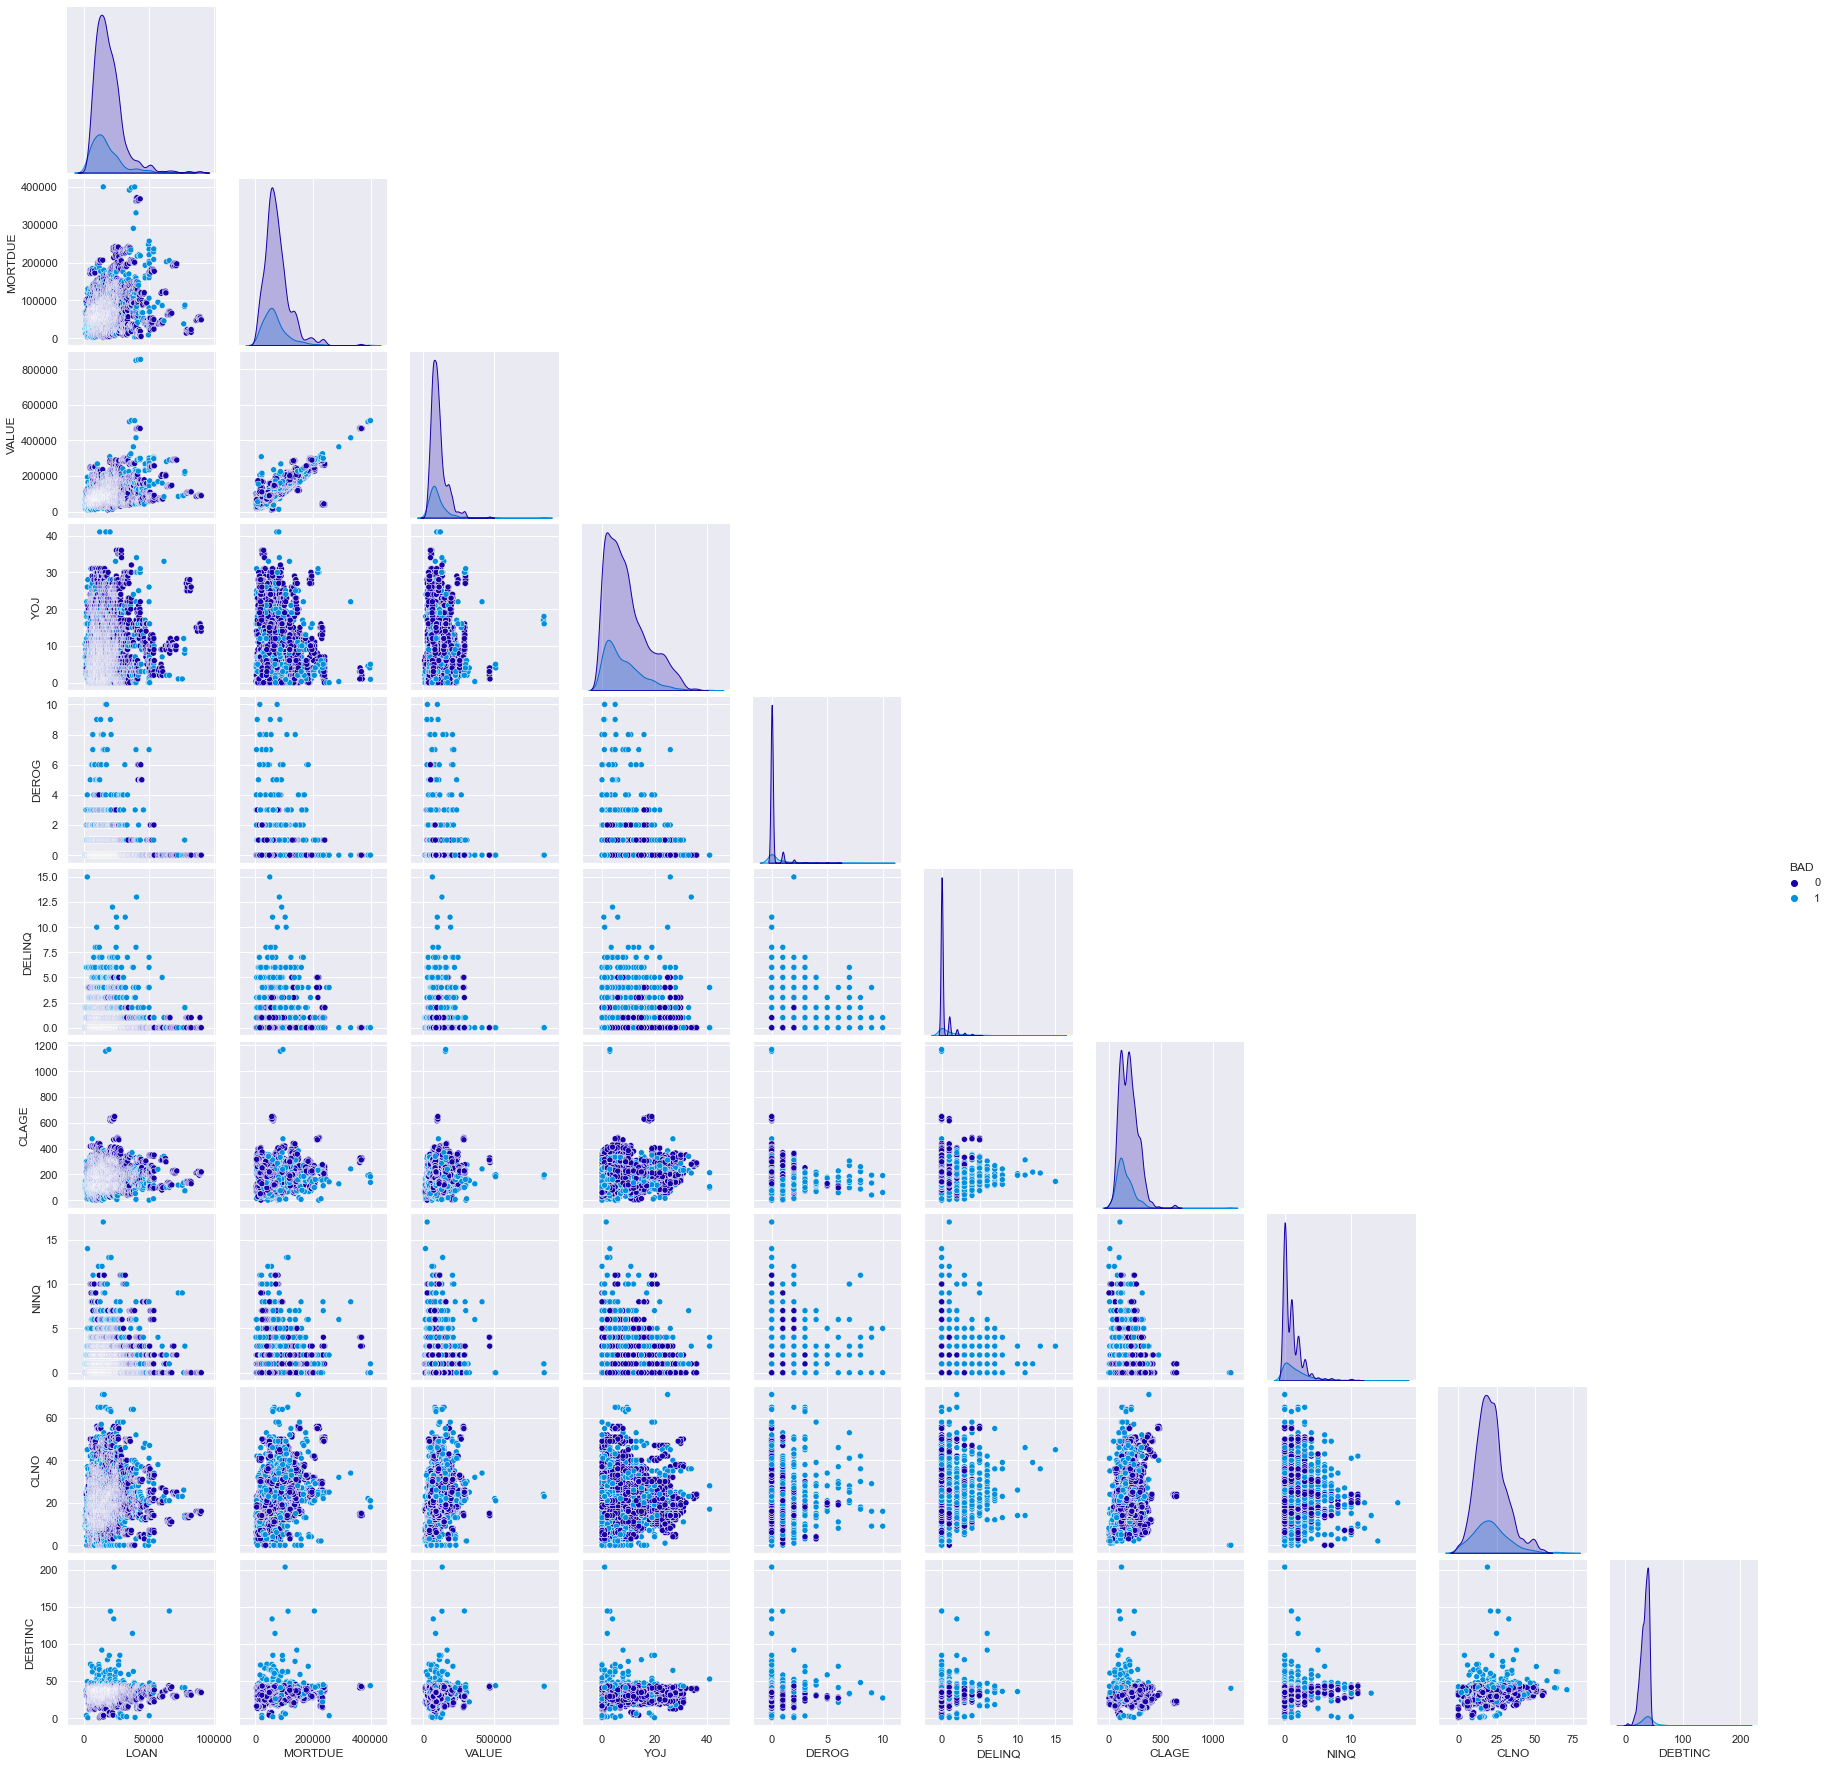

In [34]:
# Build pairplot for the data with hue = 'BAD'

sns.pairplot(data, hue='BAD', corner = True)

### **Think about it**
- Are there missing values and outliers in the dataset? If yes, how can you treat them? 
- Can you think of different ways in which this can be done and when to treat these outliers or not?
- Can we create new features based on Missing values?

#### Treating Outliers

In [35]:
def treat_outliers(df,col):
    '''
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    '''
    
    Q1=df.quantile(0.25)[col] # 25th quantile
    Q3=df.quantile(0.75)[col]  # 75th quantile
    IQR=Q3-Q1   # IQR Range
    Lower_Whisker = Q1-1.5*IQR  #define lower whisker
    Upper_Whisker = Q3+1.5*IQR  # define upper Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker) # all the values samller than Lower_Whisker will be assigned value of Lower_whisker 
                                                            # and all the values above upper_whishker will be assigned value of upper_Whisker 
    return df

def treat_outliers_all(df, col_list):
    '''
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    '''
    for c in col_list:
        df = treat_outliers(df,c)
        
    return df
    

In [36]:
data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [37]:
df_raw = data.copy()

numerical_col = df_raw.select_dtypes(include=np.number).columns.tolist()# getting list of numerical columns

df = treat_outliers_all(df_raw,numerical_col)

#### Adding new columns in the dataset for each column which has missing values 

In [38]:
#For each column we create a binary flag for the row, if there is missing value in the row, then 1 else 0. 
def add_binary_flag(df,col):
    '''
    df: It is the dataframe
    col: it is column which has missing values
    It returns a dataframe which has binary flag for missing values in column col
    '''
    new_col = str(col)
    new_col += '_missing_values_flag'
    df[new_col] = df[col].isna()
    return df

In [39]:
# list of columns that has missing values in it
missing_col = [col for col in df.columns if df[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(df,colmn)
    

#### Filling missing values in numerical columns with median and mode in categorical variables

In [40]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.
num_data = df.select_dtypes('number')

# Select string and object columns.
cat_data = df.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.

df[num_data.columns] = num_data.median()

# Fill object columns with model.

for column in cat_data:
    mode = df[column].mode()[0]
    df[column] = df[column].fillna(mode)

In [41]:
df.describe(include=['category']).T

,count,unique,top,freq
BAD,5960,2,0,4771
REASON,5960,2,DebtCon,4180
JOB,5960,6,Other,2667


## **Proposed approach**
**1. Potential techniques** - What different techniques should be explored?

**2. Overall solution design** - What is the potential solution design?

**3. Measures of success** - What are the key measures of success?

# **Milestone 2**

## **Model Building - Approach**
1. Data preparation
2. Partition the data into train and test set
3. Fit on the train data
4. Tune the model and prune the tree, if required
5. Test the model on test set

## **Data Preparation**

### **Separating the target variable from other variables**

In [42]:
# Drop the dependent variable from the dataframe and create the X(independent variable) matrix

X = df.drop(columns='BAD')

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function

X = pd.get_dummies(X, drop_first=True)

# Create y(dependent varibale)

y = df['BAD']

### **Splitting the data into 70% train and 30% test set**

In [43]:
# Split the data into training and test set

X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size = 0.30, random_state = 1)

### **Think about it** 
- You can try different splits like 70:30 or 80:20 as per your choice. Does this change in split affect the performance?
- If the data is imbalanced, can you make the split more balanced and if yes, how?

In [44]:
print("Shape of the training set: ", X_train_70.shape)   

print("Shape of the test set: ", X_test_70.shape)

print("Percentage of classes in the training set:")

print(y_train_70.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test_70.value_counts(normalize = True))

Shape of the training set:  (4172, 27)
Shape of the test set:  (1788, 27)
Percentage of classes in the training set:
0    0.804171
1    0.195829
Name: BAD, dtype: float64
Percentage of classes in the test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


### **Splitting the data into 80% train and 20% test set**

In [45]:
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(X, y, test_size = 0.20, random_state = 1)

In [46]:
print("Shape of the training set: ", X_train_80.shape)   

print("Shape of the test set: ", X_test_80.shape)

print("Percentage of classes in the training set:")

print(y_train_80.value_counts(normalize = True))

print("Percentage of classes in the test set:")

print(y_test_80.value_counts(normalize = True))

Shape of the training set:  (4768, 27)
Shape of the test set:  (1192, 27)
Percentage of classes in the training set:
0    0.802643
1    0.197357
Name: BAD, dtype: float64
Percentage of classes in the test set:
0    0.791946
1    0.208054
Name: BAD, dtype: float64


## **Insights**
- Both the 80-20 split and 70-30 split result in the training and test set class percentages similar to the class percentage of the entire dataset.
- In creating these models, we will use the 70-30 split.

In [47]:
X_train, X_test, y_train, y_test = X_train_70, X_test_70, y_train_70, y_test_70

## **Model Evaluation Criterion**

#### After understanding the problem statement, think about which evaluation metrics to consider and why. 

In [48]:
#creating metric function 
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### **Build a Logistic Regression Model** 

In [49]:
# Defining the Logistic regression model
logistic = LogisticRegression()

# Fitting the model on the training data 
logistic.fit(X_train, y_train)

LogisticRegression()

#### Checking the performance on the train dataset

In [50]:
#Predict for train set

y_pred_train_logistic = logistic.predict(X_train)

#checking the performance on the train dataset

print("R-Squared:", logistic.score(X_train, y_train))

se_train = (y_train.to_numpy() - y_pred_train_logistic)**2

mse_train = se_train.mean()

print('MSE: ', mse_train)

R-Squared: 0.8041706615532119
MSE:  0.1958293384467881


#### Checking the performance on the test dataset

In [51]:
#Predict for test set

y_pred_test_logistic = logistic.predict(X_test)

#checking the performance on the test dataset

print("R-Squared:", logistic.score(X_test, y_test))

se_test = (y_test.to_numpy() - y_pred_test_logistic)**2

mse_test = se_test.mean()

print('MSE: ', mse_test)

R-Squared: 0.7919463087248322
MSE:  0.2080536912751678


**Observations:**
- The R-Squared of both the training and test data was around 80%
- The MSE of both was around 0.20 also.
- This implies that the model is fitting the training data correctly.

#### Let's check the coefficients, and check which variables are important and how they affect the process of loan approval

In [52]:
# Printing the coefficients of logistic regression

table = list(zip(['Intercept'] + X.columns.to_list(), np.concatenate((np.array(logistic.intercept_), logistic.coef_[0]))))
print(tabulate(table))

---------------------------  ------------
Intercept                    -1.13402e-10
LOAN                         -1.84845e-06
MORTDUE                      -7.37328e-06
VALUE                        -1.01195e-05
YOJ                          -7.93813e-10
DEROG                         0
DELINQ                        0
CLAGE                        -1.96715e-08
NINQ                         -1.13402e-10
CLNO                         -2.26804e-09
DEBTINC                      -3.94846e-09
MORTDUE_missing_values_flag  -3.11026e-11
VALUE_missing_values_flag     1.69044e-10
REASON_missing_values_flag   -8.58932e-12
JOB_missing_values_flag      -8.32996e-11
YOJ_missing_values_flag      -9.82499e-11
DEROG_missing_values_flag    -1.48246e-10
DELINQ_missing_values_flag   -1.11122e-10
CLAGE_missing_values_flag     2.44905e-11
NINQ_missing_values_flag     -7.83641e-11
CLNO_missing_values_flag      4.8625e-12
DEBTINC_missing_values_flag   1.08775e-09
REASON_HomeImp                3.05434e-11
JOB_Office   

**Insights**
- The VALUE of the property is the most important variable in the repayment of the loan.
- The MORTDUE and LOAN are also important variables based on the logistic regression model.
- DEROG and DELINQ have no effect on the repayment.

### **Think about it:**
- The above Logistic regression model was build on the threshold of 0.5, can we use different threshold?
- How to get an optimal threshold and which curve will help you achieve?
- How does, accuracy, precision and recall change on the threshold?

### **Build a Decision Tree Model**

### **Think about it:**
- In Logistic regression we treated the outliers and built the model, should we do the same for tree based models or not? If not, why?

#### Data Preparation for the tree based model

In [53]:
# Add binary flags
# List of columns that has missing values in it

missing_col = [col for col in data.columns if data[col].isnull().any()]

for colmn in missing_col:
    add_binary_flag(data,colmn)
    

In [54]:
#  Treat Missing values in numerical columns with median and mode in categorical variables
# Select numeric columns.

num_data = data.select_dtypes('number')

# Select string and object columns.

cat_data = data.select_dtypes('category').columns.tolist()#df.select_dtypes('object')

# Fill numeric columns with median.

data[num_data.columns] = num_data.median()

# Fill object columns with model.

for column in cat_data:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

#### Separating the target variable y and independent variable x

In [55]:
# Drop dependent variable from dataframe and create the X(independent variable) matrix

X = data.drop(columns = 'BAD')

# Create dummy variables for the categorical variables - Hint: use the get_dummies() function

X = pd.get_dummies(X, drop_first = True)

# Create y(dependent varibale)

y = data['BAD']

#### Split the data

In [56]:
# Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 1)

In [57]:
#Defining Decision tree model with class weights class_weight={0: 0.2, 1: 0.8}
d_tree =  DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})

In [58]:
#fitting Decision tree model
d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8})

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3355
           1       0.64      0.72      0.68       817

    accuracy                           0.87      4172
   macro avg       0.79      0.81      0.80      4172
weighted avg       0.87      0.87      0.87      4172



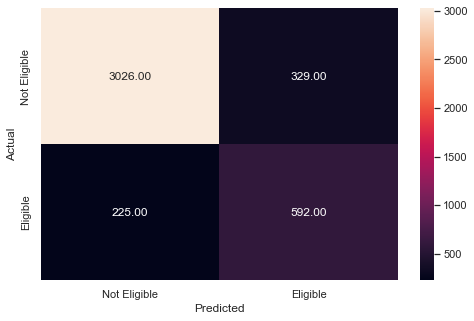

In [59]:
# Checking performance on the training data
y_pred_train = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1416
           1       0.66      0.70      0.68       372

    accuracy                           0.86      1788
   macro avg       0.79      0.80      0.80      1788
weighted avg       0.87      0.86      0.86      1788



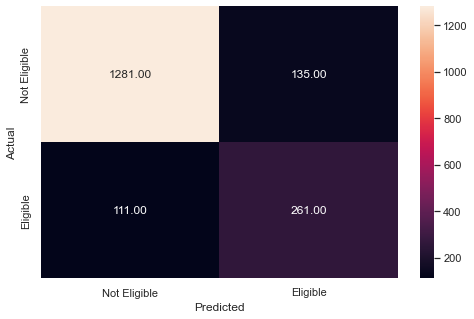

In [60]:
# Checking performance on the testing data
y_pred_test = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test)

**Insights**
- The decision tree is working as well on the test data compared to the training data
- The precision for the training and test data were 0.64 and 0.66 respectively which suggests that the decision tree model is correctly fitting the training data.
- However, the low precision suggests that there is a 34% chance that the model will predict that an eligible loan candidate will end up defaulting.

### **Think about it:**
- Can we improve this model? 
- How to get optimal parameters in order to get the best possible results?

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


#### Using GridSearchCV for Hyperparameter tuning on the model

In [61]:
# Choose the type of classifier. 

d_tree_tuned = DecisionTreeClassifier(random_state = 7, class_weight = {0: 0.3, 1: 0.7})


# Grid of parameters to choose from

parameters = {'max_depth': np.arange(2, 10), 
              'criterion': ['gini', 'entropy'],
              'min_samples_leaf': [5, 10, 20, 25]
             }


# Type of scoring used to compare parameter combinations

scorer = metrics.make_scorer(recall_score, pos_label = 1)


# Run the grid search

grid_obj = GridSearchCV(d_tree_tuned, parameters, scoring = scorer, cv = 5)


# Fit the GridSearch on train dataset

grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters

d_tree_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 

d_tree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=2,
                       min_samples_leaf=5, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3355
           1       0.64      0.72      0.68       817

    accuracy                           0.87      4172
   macro avg       0.79      0.81      0.80      4172
weighted avg       0.87      0.87      0.87      4172



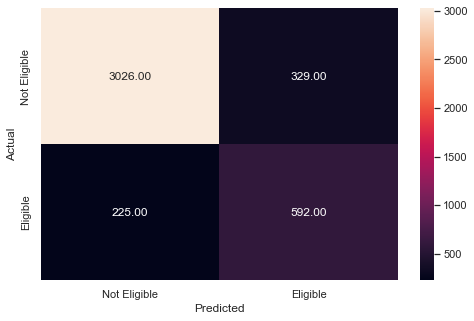

In [62]:
# Checking performance on the training data based on the tuned model
y_pred_train = d_tree.predict(X_train)

metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1416
           1       0.66      0.70      0.68       372

    accuracy                           0.86      1788
   macro avg       0.79      0.80      0.80      1788
weighted avg       0.87      0.86      0.86      1788



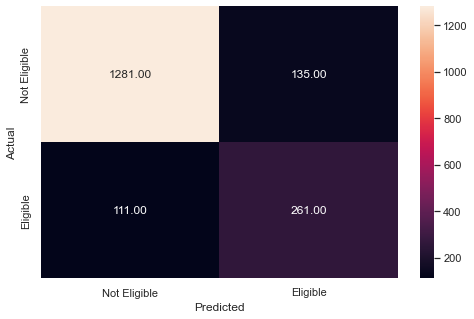

In [63]:
# Checking performance on the testing data based on the tuned model
y_pred_test = d_tree.predict(X_test)

metrics_score(y_test, y_pred_test)

**Insights**
- The hyperparameter tuned decision tree performed similarly to the non-tuned decision tree. This makes sense since the original decision tree was not overfitting the training data.
- The recall remained around 0.70 or 30% of clients who repaid their loans were predicted to default.

#### Plotting the Decision Tree

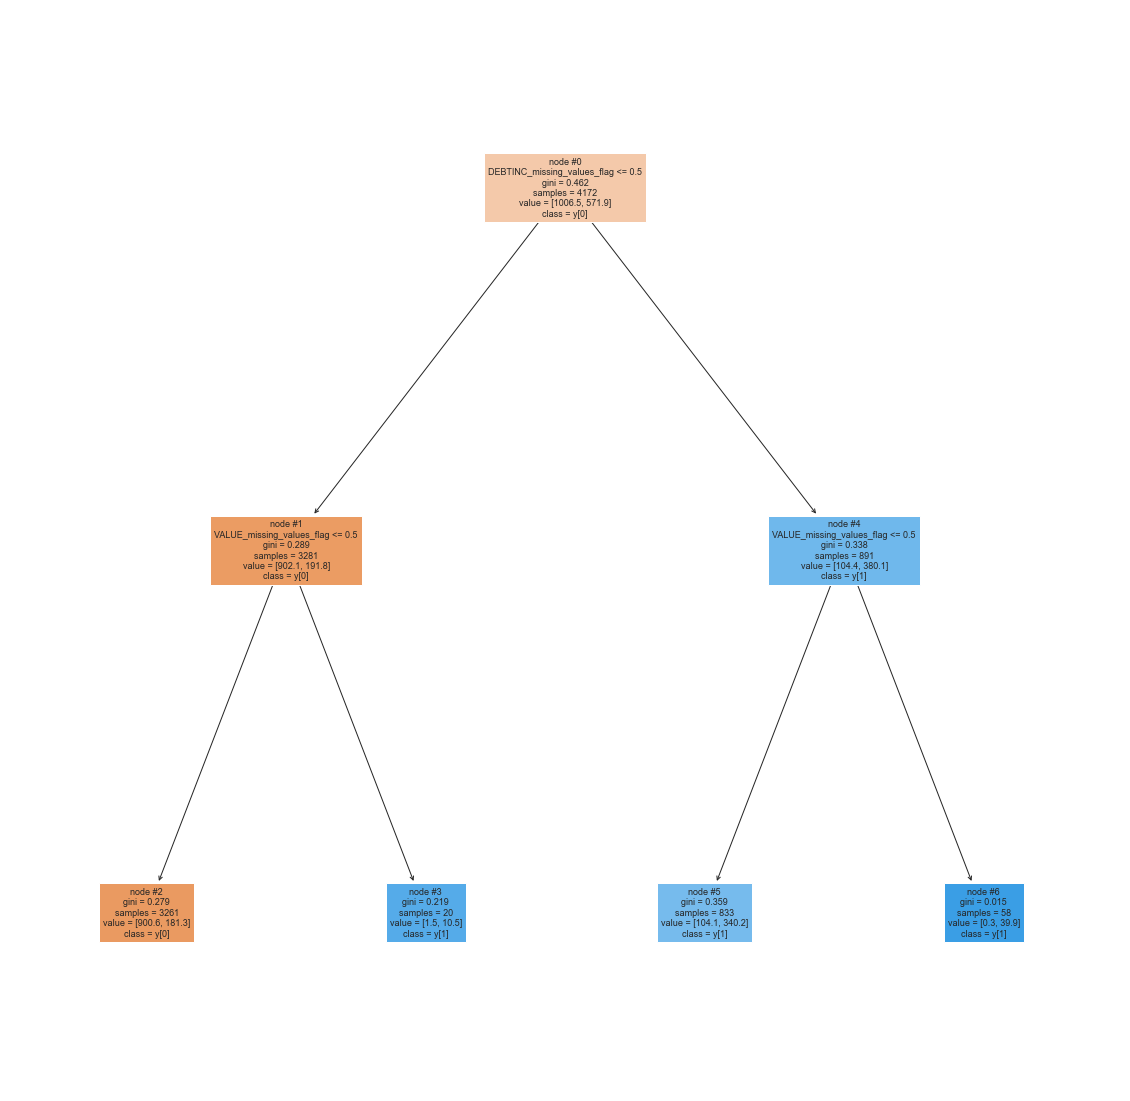

In [64]:
# Plot the decision  tree and analyze it to build the decision rule
features = list(X.columns)

plt.figure(figsize = (20, 20))

tree.plot_tree(d_tree_tuned, feature_names = features, filled = True, fontsize = 9, node_ids = True, class_names = True)

plt.show()

#### Deduce the business rules apparent from the Decision Tree and write them down: 

**Note:** Blue leaves represent the defaulted loans, i.e., **y[1]**, while the orange leaves represent the not repaid loans, i.e., **y[0]**. Also, the more the number of observations in a leaf, the darker its color gets.

**Observations:**
- Clients who were not missing a debt-to-income ratio and were not missing the property value were likely to have repaid their loans.
- Regardless of debt-to-income ratio status, clients who were missing the property value were more likely to have defaulted on the loan.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [65]:
# Defining Random forest CLassifier
rf_estimator = RandomForestClassifier(random_state = 7)

rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      3355
           1       0.68      0.68      0.68       817

    accuracy                           0.87      4172
   macro avg       0.80      0.80      0.80      4172
weighted avg       0.87      0.87      0.87      4172



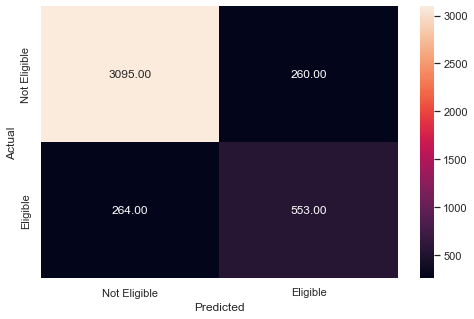

In [66]:
#Checking performance on the training data

y_pred_train = rf_estimator.predict(X_train)

metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1416
           1       0.70      0.65      0.67       372

    accuracy                           0.87      1788
   macro avg       0.81      0.79      0.80      1788
weighted avg       0.87      0.87      0.87      1788



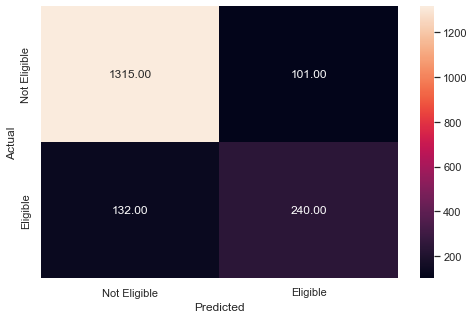

In [67]:
# Checking performance on the test data

y_pred_test = rf_estimator.predict(X_test)

metrics_score(y_test, y_pred_test)

**Observations:**
- The Random Forest Classifier is producing similar results to both Decision Trees.
 - The precision of the test data increased to 0.70; however, the recall fell to 0.65.

### **Build a Random Forest model with Class Weights**

### **Class Weight: 80-20**

In [68]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

rf_estimator_80_20 = RandomForestClassifier(random_state = 7, class_weight={0: 0.2, 1: 0.8})

# Fitting Random Forest model### **Class Weight: 80-20**

rf_estimator_80_20.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.93      0.90      0.92      3355
           1       0.65      0.72      0.68       817

    accuracy                           0.87      4172
   macro avg       0.79      0.81      0.80      4172
weighted avg       0.87      0.87      0.87      4172



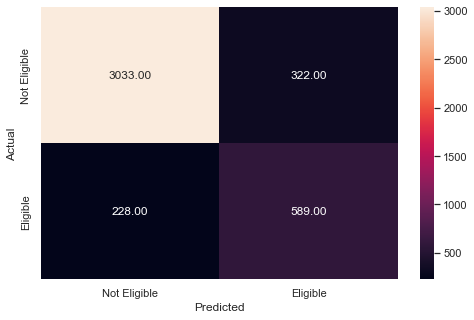

In [69]:
# Checking performance on the train data

y_pred_train = rf_estimator_80_20.predict(X_train)

metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1416
           1       0.67      0.70      0.68       372

    accuracy                           0.87      1788
   macro avg       0.80      0.80      0.80      1788
weighted avg       0.87      0.87      0.87      1788



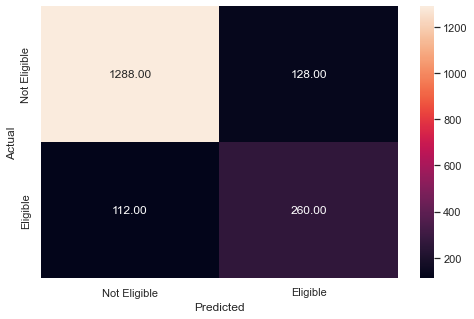

In [70]:
# Checking performance on the test data

y_pred_test = rf_estimator_80_20.predict(X_test)

metrics_score(y_test, y_pred_test)

**Observations:**
- The Random Forest Classifier with a class weight split of 80-20 has a precision of 0.67.
- Weighting the classes to 80-20 did not impact the results of the model profoundly.

### **Class Weight: 70-30**

In [71]:
# Defining Random Forest model with class weights class_weight={0: 0.2, 1: 0.8}

rf_estimator_70_30 = RandomForestClassifier(random_state = 7, class_weight={0: 0.3, 1: 0.7})

# Fitting Random Forest model### **Class Weight: 70-30**

rf_estimator_70_30.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.3, 1: 0.7}, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      3355
           1       0.67      0.71      0.69       817

    accuracy                           0.87      4172
   macro avg       0.80      0.81      0.80      4172
weighted avg       0.88      0.87      0.87      4172



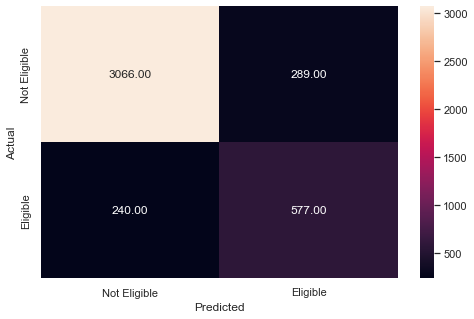

In [72]:
# Checking performance on the train data

y_pred_train = rf_estimator_70_30.predict(X_train)

metrics_score(y_train, y_pred_train)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1416
           1       0.69      0.69      0.69       372

    accuracy                           0.87      1788
   macro avg       0.80      0.80      0.80      1788
weighted avg       0.87      0.87      0.87      1788



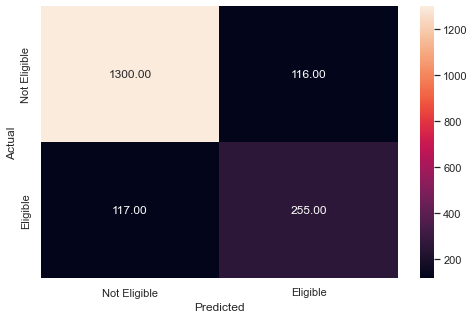

In [73]:
# Checking performance on the test data

y_pred_test = rf_estimator_70_30.predict(X_test)

metrics_score(y_test, y_pred_test)

**Observations:**
- The Random Forest Classifier with a class weight split of 70-30 has a precision of 0.69.
- Compared to the 80-20 class weight split, the 70-30 had slightly higher precision and similar recall.
- Class Weight is not making significant improvements to the accuracy of the model.

### **Think about it:**
- Can we try different weights?
- If yes, should we increase or decrease class weights for different classes? 

### **Tuning the Random Forest**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.


**n_estimators**: The number of trees in the forest.

**min_samples_split**: The minimum number of samples required to split an internal node:

**min_samples_leaf**: The minimum number of samples required to be at a leaf node. 

**max_features{“auto”, “sqrt”, “log2”, 'None'}**: The number of features to consider when looking for the best split.

- If “auto”, then max_features=sqrt(n_features).

- If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

- If “log2”, then max_features=log2(n_features).

- If None, then max_features=n_features.

You can learn more about Random Forest Hyperparameters from the link given below and try to tune them

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

#### **Warning:** This may take a long time depending on the parameters you tune. 

In [74]:
# Choose the type of classifier. 
rf_estimator_tuned = RandomForestClassifier(criterion = "entropy", random_state = 7)


# Grid of parameters to choose from
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [4, 6],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.19, 1: 0.81}]
             }


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(precision_score, pos_label = 1)


# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, parameters, scoring = scorer, cv = 5)


#fit the GridSearch on train dataset
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_


# Fit the best algorithm to the data. 
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.9, max_samples=0.9,
                       min_samples_leaf=4, n_estimators=110, random_state=7)

#### Checking the performance on the train dataset

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      3355
           1       0.63      0.69      0.66       817

    accuracy                           0.86      4172
   macro avg       0.78      0.79      0.78      4172
weighted avg       0.86      0.86      0.86      4172



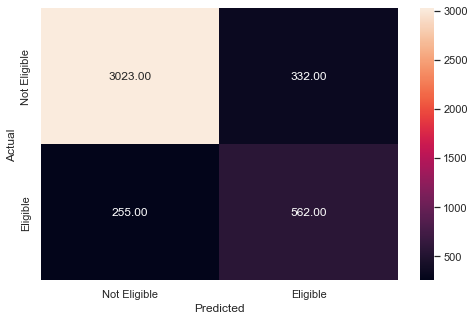

In [75]:
# Checking performance on the training data
y_pred_train = rf_estimator_tuned.predict(X_train)

metrics_score(y_train, y_pred_train)

#### Checking the performance on the test dataset

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      1416
           1       0.67      0.68      0.67       372

    accuracy                           0.86      1788
   macro avg       0.79      0.80      0.79      1788
weighted avg       0.86      0.86      0.86      1788



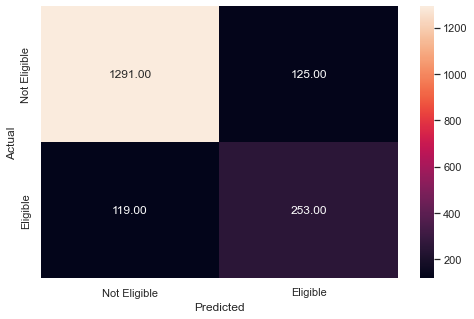

In [76]:
# Checking performace on test dataset
y_pred_test = rf_estimator_tuned.predict(X_test)

metrics_score(y_test, y_pred_test)

**Insights:**
- Fiddling with the parameters, the precision still hovered around 0.67. We got similar numbers for recall in the test data.

#### Plot the Feature importance of the tuned Random Forest

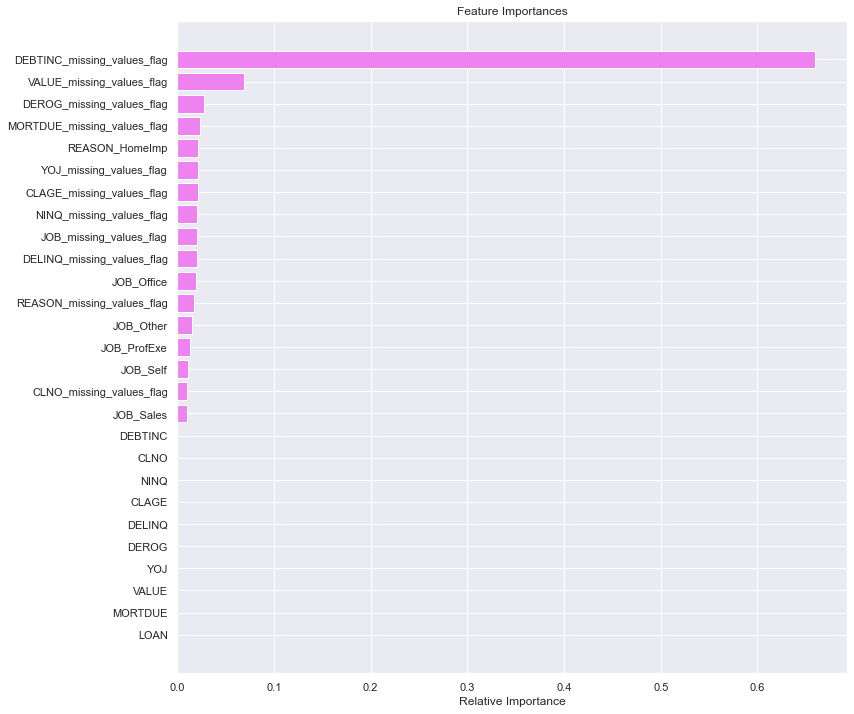

In [77]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
# Checking performace on test dataset

importances = rf_estimator_80_20.feature_importances_

indices = np.argsort(importances)

feature_names = list(X.columns)

plt.figure(figsize = (12, 12))

plt.title('Feature Importances')

plt.barh(range(len(indices)), importances[indices], color = 'violet', align = 'center')

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])

plt.xlabel('Relative Importance')

plt.show()

### **Think about it:**
- We have only built 3 models so far, Logistic Regression, Decision Tree and Random Forest 
- We can build other Machine Learning classification models like kNN, LDA, QDA or even Support Vector Machines (SVM).
- Can we also perform feature engineering and create model features and build a more robust and accurate model for this problem statement? 

### **Comparing Model Performances**

In [78]:
def get_recall_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    a = [] # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    a.append(train_recall) # adding train recall to list 
    a.append(test_recall) # adding test recall to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
    
    return a # returning the list with train and test scores

In [79]:
##  Function to calculate precision score
def get_precision_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    b = []  # defining an empty list to store train and test results
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    b.append(train_precision) # adding train precision to list
    b.append(test_precision) # adding test precision to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))

    return b # returning the list with train and test scores

In [80]:
##  Function to calculate accuracy score
def get_accuracy_score(model,flag=True,X_train=X_train,X_test=X_test):
    '''
    model : classifier to predict values of X

    '''
    c = [] # defining an empty list to store train and test results
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    c.append(train_acc) # adding train accuracy to list
    c.append(test_acc) # adding test accuracy to list
    
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
    
    return c # returning the list with train and test scores

In [81]:
# Make the list of all the model names 

models = [d_tree, d_tree_tuned, rf_estimator, rf_estimator_80_20, rf_estimator_70_30, rf_estimator_tuned]

# defining empty lists to add train and test results
acc_train = []
acc_test = []
recall_train = []
recall_test = []
precision_train = []
precision_test = []

# looping through all the models to get the accuracy,recall and precision scores
for model in models:
     # accuracy score
    j = get_accuracy_score(model,False)
    acc_train.append(j[0])
    acc_test.append(j[1])

    # recall score
    k = get_recall_score(model,False)
    recall_train.append(k[0])
    recall_test.append(k[1])

    # precision score
    l = get_precision_score(model,False)
    precision_train.append(l[0])
    precision_test.append(l[1])

In [82]:
# Mention the Model names in the list. for example 'Model': ['Decision Tree', 'Tuned Decision Tree'..... write the names of all model built]

comparison_frame = pd.DataFrame({'Model':["Decision Tree", "Tuned Decision Tree", "Random Forest", "Random Forest 80-20", "Random Forest 70-30", "Tuned Random Forest"], 
                                          'Train_Accuracy': acc_train,
                                          'Test_Accuracy': acc_test,
                                          'Train_Recall': recall_train,
                                          'Test_Recall': recall_test,
                                          'Train_Precision': precision_train,
                                          'Test_Precision': precision_test}) 
comparison_frame

,Model,Train_Accuracy,Test_Accuracy,Train_Recall,Test_Recall,Train_Precision,Test_Precision
0,Decision Tree,0.867210,0.862416,0.724602,0.701613,0.642780,0.659091
1,Tuned Decision Tree,0.853308,0.858501,0.682987,0.680108,0.612514,0.653747
2,Random Forest,0.874401,0.869687,0.676867,0.645161,0.680197,0.703812
3,Random Forest 80-20,0.868169,0.865772,0.720930,0.698925,0.646542,0.670103
4,Random Forest 70-30,0.873202,0.869687,0.706242,0.685484,0.666282,0.687332
5,Tuned Random Forest,0.859300,0.863535,0.687882,0.680108,0.628635,0.669312


**Insights:**
- The Logistic Regression model was the least accurate of all the models with an R-Squared of 0.79.
- Since the decision tree and random forest models were already fitted correctly, tuning didn't have a significant effect on the model precision.
- The Random Forest model had the highest precision of all the models.
 - It only has a precision of 0.70, however. Which means that of the clients that the model would predict would repay their loans, 30% ended up defaulting.
- The best model was the Random Forest Class Weight: 80-20.
 - It had a test accuracy of 87%, a recall of 70% and a precision of 67%
- None of the models were reliable predictors of client repayment, and it would be worthwhile to scope out more precise options.
- The models are not complex which allows them to be interpretable. It is easy to retain insight into how inputs relate to the loan default status. While more complex models may raise the accuracy and precision of our predictor, it could come at the cost of interpretability of the effect input variables on the outcome variable.

**1. Refined insights -** What are the most meaningful insights from the data relevant to the problem?

**2. Comparison of various techniques and their relative performance -** How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

**3. Proposal for the final solution design -** What model do you propose to be adopted? Why is this the best solution to adopt?